In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

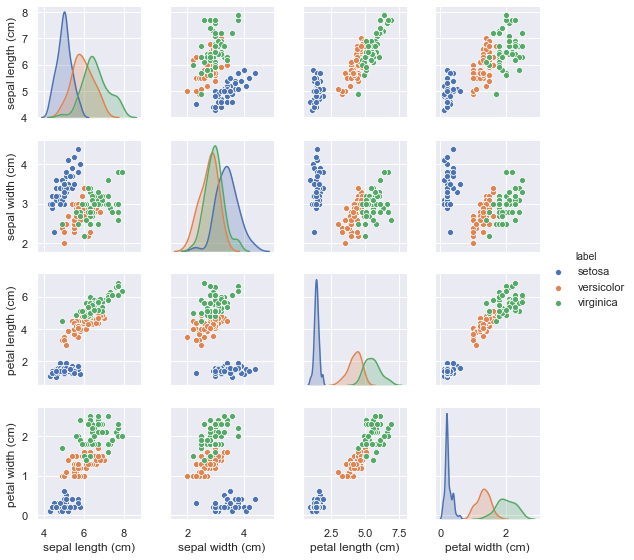

In [3]:
sns.set()
df = pd.DataFrame(iris.data, columns=iris['feature_names'] )
df['target'] = iris.target
df['label'] = df.apply(lambda x: iris['target_names'][int(x.target)], axis=1)
df.head()

sns.pairplot(df, hue='label', vars=iris['feature_names'], height=2);

# Classification
## Naive Bayes

In [4]:
from sklearn.naive_bayes import GaussianNB
# Classifieur
clf = GaussianNB()
# Apprentissage 
clf.fit(iris.data, iris.target) # On aurait aussi pu utiliser le dataframe df
result = clf.predict(iris.data)


In [5]:
errors = sum(result != iris.target) # 6 erreurs sur 150 mesures
print("Nb erreurs:", errors)
print( "Pourcentage de prédiction juste:", (150-errors)*100/150)   

Nb erreurs: 6
Pourcentage de prédiction juste: 96.0


In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(result, iris.target) # 96% de réussite

0.96

In [7]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(iris.target, result)

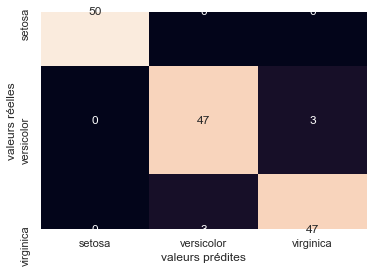

In [8]:
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');